# Data Manipulation and Plotting with `pandas`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

## Learning Goals

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a .csv file.

Read about this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [2]:
heart_df = pd.read_csv('heart.csv')

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [3]:
type(heart_df)

pandas.core.frame.DataFrame

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [5]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [6]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [7]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [8]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [9]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### `.tail()`

In [10]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()`

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### `.describe()`

In [12]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `.dtypes`

In [13]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape`

In [14]:
heart_df.shape

(303, 14)

### Exploratory Plots

Let's make ourselves a histogram of ages:

/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


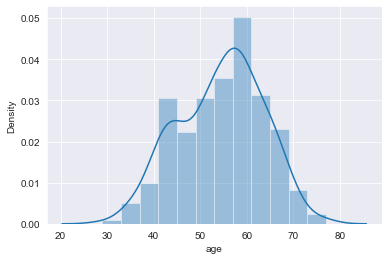

In [15]:
sns.set_style('darkgrid')
sns.distplot(a=heart_df['age']);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

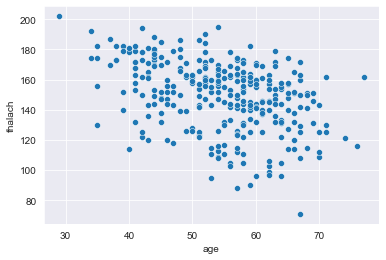

In [16]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach']);

## Adding to a DataFrame


### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [17]:
extra_rows = {'age': [40, 30], 'sex': [1, 0], 'cp': [0, 0], 'trestbps': [120, 130],
              'chol': [240, 200],
             'fbs': [0, 0], 'restecg': [1, 0], 'thalach': [120, 122], 'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 'slope': [1, 1], 'ca': [0, 1], 'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [18]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [19]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

heart_augmented = pd.concat([heart_df, missing],
                           ignore_index=True)

In [20]:
# Let's check the end to make sure we were successful!

heart_augmented.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [21]:
heart_augmented['test'] = 0

In [22]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [23]:
heart_augmented['chol+trestbps'] = heart_augmented['chol'] + heart_augmented['trestbps']

In [24]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [25]:
heart_augmented[heart_augmented['age'] >= 70]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,389
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,337
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,401
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,261
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,319
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0,452
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,429
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,429


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

<details>
    <summary>Answer</summary>
    <code>heart_augmented[(heart_augmented['age'] >= 70) | (heart_augmented['trestbps'] > 170)]</code>
    </details>

### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

In [26]:
at_risk = #[ANSWER FROM EXERCISE]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

SyntaxError: invalid syntax (<ipython-input-26-cf4283824a79>, line 1)

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [ ]:
heart_augmented.loc

In [ ]:
heart_augmented.loc[:9, ['age', 'trestbps']]

`.iloc` is used for selecting locations in the DataFrame **by number**:

In [ ]:
heart_augmented.iloc

In [ ]:
heart_augmented.iloc[3, 0]

### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

<details>
    <summary>Answer</summary>
    <code>heart_augmented.iloc[:10, [0, 3]]</code>
    </details>

## Statistics

### `.mean()`

In [ ]:
heart_augmented.mean()

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [ ]:
heart_augmented.min()

### `.max()`

In [ ]:
heart_augmented.max()

## Series Methods

### `.value_counts()`

How many different values does have slope have? What about sex? And target?

In [ ]:
heart_augmented['slope'].value_counts()

### `.sort_values()`

In [ ]:
heart_augmented['age'].sort_values()

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

In [ ]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

In [ ]:
heart_augmented.hist(column='chol');

## Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

<details>
    <summary>Answer</summary>
    <code>sns.barplot(data=heart_augmented, x='slope', y='age');</code>
    </details>
    
    

<AxesSubplot:xlabel='slope', ylabel='age'>

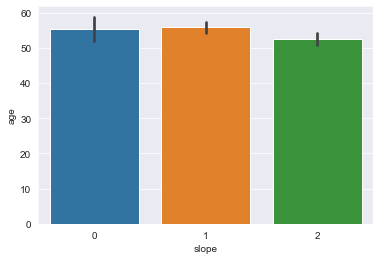

In [36]:
# heart_augmented
# heart_augmented.plot(x='age', y='slope', ylim=10,kind='bar')
sns.barplot(data=heart_augmented, x='slope', y='age')

2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

<details>
    <summary>Answer</summary>
<code>men = heart_augmented[heart_augmented['sex'] == 1]
sns.distplot(a=men['age']);</code>
    </details>

<AxesSubplot:xlabel='age', ylabel='Count'>

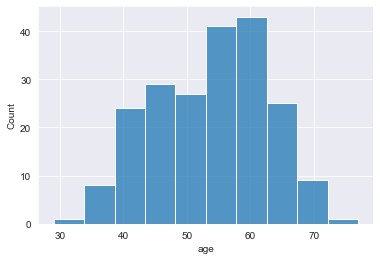

In [52]:
sns.histplot(data= heart_augmented[heart_augmented['sex']==1]['age'], bins = 10)

3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

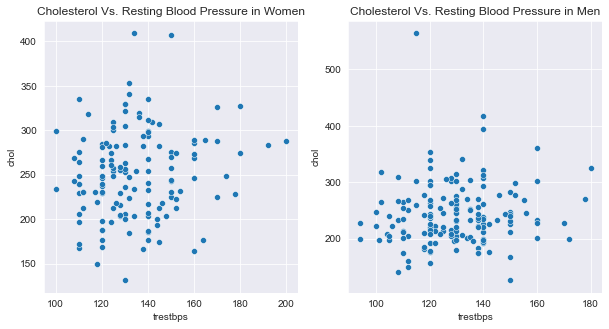

In [54]:
target0 = heart_augmented[heart_augmented['target'] == 0]
target1 = heart_augmented[heart_augmented['target'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=target0, x='trestbps', y='chol', ax=ax[0])
sns.scatterplot(data=target1, x='trestbps', y='chol', ax=ax[1])
ax[0].set_title('Cholesterol Vs. Resting Blood Pressure in Women')
ax[1].set_title('Cholesterol Vs. Resting Blood Pressure in Men');

<details>
    <summary>Answer</summary>
<code>target0 = heart_augmented[heart_augmented['target'] == 0]
target1 = heart_augmented[heart_augmented['target'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=target0, x='trestbps', y='chol', ax=ax[0])
sns.scatterplot(data=target1, x='trestbps', y='chol', ax=ax[1])
ax[0].set_title('Cholesterol Vs. Resting Blood Pressure in Women')
    ax[1].set_title('Cholesterol Vs. Resting Blood Pressure in Men');</code>
    </details>

## Let's find a .csv file online and experiment with it.

I'm going to head to [dataportals.org](https://dataportals.org) to find a .csv file.

In [56]:
df = pd.read_csv('portals.csv')

In [57]:
df

,name,title,url,author,publisher,issued,publisher_classification,description,tags,license_id,...,place,location,country,language,status,metadatacreated,generator,api_endpoint,api_type,full_metadata_download
0,a2gov_org,"Ann Arbor, Michigan",http://www.a2gov.org/services/data/Pages/defau...,City of Ann Arbor,City of Ann Arbor,NaN,NaN,City of Ann Arbor's Open Data Catalog (USA),ctic unitedstates,NaN,...,"Ann Arbor, Michigan","42.2681569,-83.7312291",US,en,active,2011-06-27T18:12:57.439Z,NaN,NaN,NaN,NaN
1,acikveri-sahinbey-bel-tr,Açık Veri Portali - Test Yayını,http://acikveri.sahinbey.bel.tr/dataset,pinardag,SahinBey Belediyesi,31/01/2015,Government,The first official open data portal of Turkey,turkey national,Unknown,...,"Gaziantep,Turkey","37.0587715,37.380137",TR,tr,active,NaN,NaN,NaN,NaN,NaN
2,africa_open_data,Africa Open Data,http://africaopendata.org/,Africa Open Data,Africa Open Data,NaN,NaN,Africa's largest central repository for Govern...,ckan africa,NaN,...,Africa,"2.0000003,15.9999997",AF,en,active,2013-03-15T07:17:26.251Z,CKAN: 2.1.3,http://africaopendata.org/api/,NaN,NaN
3,ajuntament-de-tarragona,Open Data Tarragona,http://opendata.tarragona.cat/,Ajuntament de Tarragona,Ajuntament de Tarragona,NaN,Government,Open Data Tarragona,city spain,NaN,...,Tarragona,"41.1157, 1.2496",ES,ca es en,active,NaN,NaN,NaN,NaN,NaN
4,ajuntament-de-terassa,Open Data Terassa,http://opendata.terrassa.cat/,Ajuntament de Terassa,Ajuntament de Terassa,NaN,Government,Open Data Terassa,city spain,NaN,...,Terrasa,"41.5611, 2.0081",ES,es en,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,open_data_ps,Palestine Open Data Portal,http://www.opendata.ps/,Ministry of Telecom and IT,Ministry of Telecom and IT,2021-10-12,Government,A platform that offers (mostly) government and...,"palestine,ps",cc-by,...,Palestine,"31.916873936677476, 35.213386165348155",PS,ajp,active,2022-02-11T02:56:00Z,CKAN,http://www.opendata.ps/api/3,CKAN API,NaN
597,portal-dados-urbanos-uff,Portal de Dados Urbanos PPGAU UFF - Open data ...,https://portaldados.ppgau.uff.br/,Plano C and PPGAU-UFF,Universidade Federal Fluminense,2022-01-03,Government,Open data portal customized for urbanism and u...,"brazil,academic,urbanism",cc,...,"RJ, Brazil","-22.90501, -43.13053",BR,pt,active,2022-06-19T23:58:00Z,CKAN,https://portaldados.ppgau.uff.br/api/3,CKAN API,NaN
598,open-data-nepal,Open Data Nepal,https://opendatanepal.com/,Open Knowledge Nepal,Open Knowledge Nepal,2018-03-03,Community,A civil society initiative to make Nepal’s dat...,ckan nepal,cc-by,...,"Kathmandu, Nepal","27.7097,85.3209",NP,en,active,2022-07-01T08:37Z,ckan,https://opendatanepal.com/api,CKAN API,NaN
599,stat-tj,Agency on Statistics under President of the Re...,https://www.stat.tj/en,The Statistical Agency under President of the ...,The Statistical Agency under President of the ...,NaN,Government,The information in the Statistical Agency is p...,tajikistan statistics,Other (Not Open),...,Tajikistan,"38.5754817,68.7900625",TJ,en,active,2022-07-17T16:49:49,NaN,NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      601 non-null    object
 1   title                     601 non-null    object
 2   url                       601 non-null    object
 3   author                    536 non-null    object
 4   publisher                 540 non-null    object
 5   issued                    97 non-null     object
 6   publisher_classification  219 non-null    object
 7   description               552 non-null    object
 8   tags                      528 non-null    object
 9   license_id                289 non-null    object
 10  license_url               39 non-null     object
 11  license_notes             22 non-null     object
 12  place                     599 non-null    object
 13  location                  578 non-null    object
 14  country                   

In [64]:
df.describe()

,name,title,url,author,publisher,issued,publisher_classification,description,tags,license_id,...,place,location,country,language,status,metadatacreated,generator,api_endpoint,api_type,full_metadata_download
count,601,601,601,536,540,97,219,552,528,289,...,599,578,586,592,601,459,94,44,77,15
unique,597,595,597,494,503,87,7,548,275,43,...,494,491,129,77,3,423,24,44,8,15
top,state_of_washington,Washington,http://opendata.terrassa.cat/,African Development Bank Group,African Development Bank Group,01/09/2015,Government,"Open Data portal of the state of PE, in Brazil",canada,cc-by,...,Italy,"0,0",US,en,active,2018-09-12T10:58:52Z,CKAN,https://data.vulekamali.gov.za/api/3,CKAN API,https://data.qld.gov.au/api/3/action/current_p...
freq,4,4,2,21,22,2,190,2,45,48,...,9,10,100,271,586,30,37,1,38,1


In [69]:
air_quality = pd.read_csv('airqualitydata.csv')


In [70]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location_name                 15174 non-null  object 
 1   pod_serial_number             13791 non-null  float64
 2   location_number               13791 non-null  float64
 3   lon                           13791 non-null  float64
 4   lat                           13791 non-null  float64
 5   Month                         15174 non-null  int64  
 6   Year                          15174 non-null  int64  
 7   Day                           15174 non-null  int64  
 8   Hour                          15174 non-null  int64  
 9   PM10                          13791 non-null  float64
 10  PM2point5                     13791 non-null  float64
 11  carbon_monoxide               13744 non-null  float64
 12  carbon_monoxide_8hour         13793 non-null  float64
 13  s

In [72]:
air_quality.describe()

,pod_serial_number,location_number,lon,lat,Month,Year,Day,Hour,PM10,PM2point5,...,carbon_monoxide_8hour_scaled,sulfur_dioxide_scaled,nitrogen_dioxide_scaled,ozone_1hour_scaled,ozone_8hour_scaled,carbon_dioxide,temperature,pressure,humidity,largest_pollutant_value
count,1.379100e+04,13791.000000,13791.000000,13791.000000,15174.000000,15174.000000,15174.000000,15174.000000,13791.000000,13791.000000,...,13793.000000,13744.000000,13744.000000,0.0,13793.000000,13791.000000,13791.000000,13791.000000,13791.000000,13833.000000
mean,2.450850e+06,2620.011312,-83.735813,42.265983,8.725781,2022.065243,15.786477,11.489522,9.594077,7.457535,...,2.290852,3.624769,8.448558,NaN,16.623025,428.708903,55.710960,986.724587,67.699498,32.161938
std,2.650524e+01,71.064254,0.016411,0.022878,2.725955,0.246963,8.895729,6.919007,8.624807,6.514957,...,1.591444,8.817271,5.878821,NaN,10.300430,40.464237,19.534134,6.849837,13.080840,17.171503
min,2.450831e+06,2570.000000,-83.748489,42.233923,1.000000,2022.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.560000,960.900000,30.750000,3.703704
25%,2.450831e+06,2570.000000,-83.748489,42.233923,7.000000,2022.000000,8.000000,5.000000,6.750000,4.550000,...,1.136364,0.000000,4.009434,NaN,9.259259,410.600000,39.245000,982.500000,58.150000,20.833333
50%,2.450832e+06,2571.000000,-83.746517,42.280542,9.000000,2022.000000,16.000000,11.000000,8.750000,6.733333,...,2.272727,0.000000,7.547170,NaN,13.888889,421.987500,56.840000,986.950000,70.200000,29.687500
75%,2.450888e+06,2722.000000,-83.712801,42.283907,11.000000,2022.000000,24.000000,17.000000,11.250000,9.275000,...,3.409091,1.071429,11.792453,NaN,22.222222,438.250000,71.105000,991.000000,77.700000,39.895833
max,2.450888e+06,2722.000000,-83.712801,42.283907,12.000000,2023.000000,31.000000,23.000000,451.666667,204.200000,...,20.454545,93.089743,43.867924,NaN,96.733333,761.333333,100.220000,1010.700000,93.166667,339.695652


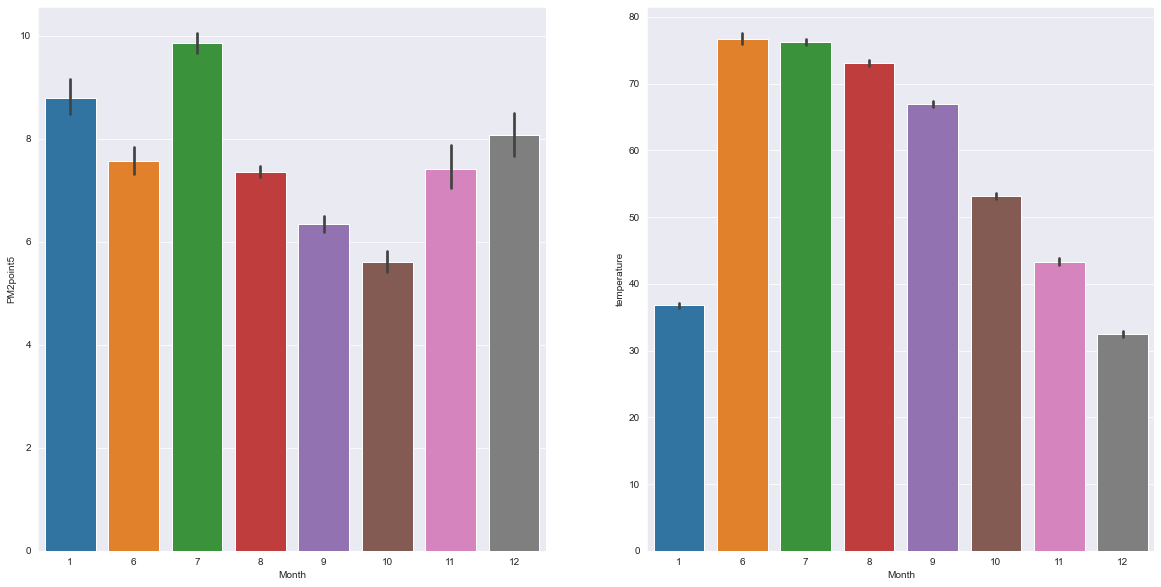

In [83]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(data=air_quality,x='Month',y='PM2point5',ax=ax[0])
sns.barplot(data=air_quality,x='Month',y='temperature',ax=ax[1])
plt.show()


In [85]:
air_quality['Month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1])

In [86]:
df.head()

,name,title,url,author,publisher,issued,publisher_classification,description,tags,license_id,...,place,location,country,language,status,metadatacreated,generator,api_endpoint,api_type,full_metadata_download
0,a2gov_org,"Ann Arbor, Michigan",http://www.a2gov.org/services/data/Pages/defau...,City of Ann Arbor,City of Ann Arbor,NaN,NaN,City of Ann Arbor's Open Data Catalog (USA),ctic unitedstates,NaN,...,"Ann Arbor, Michigan","42.2681569,-83.7312291",US,en,active,2011-06-27T18:12:57.439Z,NaN,NaN,NaN,NaN
1,acikveri-sahinbey-bel-tr,Açık Veri Portali - Test Yayını,http://acikveri.sahinbey.bel.tr/dataset,pinardag,SahinBey Belediyesi,31/01/2015,Government,The first official open data portal of Turkey,turkey national,Unknown,...,"Gaziantep,Turkey","37.0587715,37.380137",TR,tr,active,NaN,NaN,NaN,NaN,NaN
2,africa_open_data,Africa Open Data,http://africaopendata.org/,Africa Open Data,Africa Open Data,NaN,NaN,Africa's largest central repository for Govern...,ckan africa,NaN,...,Africa,"2.0000003,15.9999997",AF,en,active,2013-03-15T07:17:26.251Z,CKAN: 2.1.3,http://africaopendata.org/api/,NaN,NaN
3,ajuntament-de-tarragona,Open Data Tarragona,http://opendata.tarragona.cat/,Ajuntament de Tarragona,Ajuntament de Tarragona,NaN,Government,Open Data Tarragona,city spain,NaN,...,Tarragona,"41.1157, 1.2496",ES,ca es en,active,NaN,NaN,NaN,NaN,NaN
4,ajuntament-de-terassa,Open Data Terassa,http://opendata.terrassa.cat/,Ajuntament de Terassa,Ajuntament de Terassa,NaN,Government,Open Data Terassa,city spain,NaN,...,Terrasa,"41.5611, 2.0081",ES,es en,active,NaN,NaN,NaN,NaN,NaN


In [95]:
df_charlotte = df[df['title'].str.contains('Raleigh')]

In [96]:
df_charlotte

,name,title,url,author,publisher,issued,publisher_classification,description,tags,license_id,...,place,location,country,language,status,metadatacreated,generator,api_endpoint,api_type,full_metadata_download
373,open-raleigh,Open Raleigh,https://data.raleighnc.gov,Jason Hare,Jason Hare / Open Data Program Manager (Consul...,15/03/2013,Government,Open Raleigh tracks city data related to criti...,raleigh,Open Data Commons - Attribution,...,"Raleigh, NC","35.843768,-78.6450559",US,en,active,NaN,NaN,NaN,NaN,NaN


In [97]:
food_inspection_violation = pd.read_csv('Food_Inspection_Violations.csv')

/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [99]:
food_inspection_violation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457556 entries, 0 to 457555
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   OBJECTID         457556 non-null  int64  
 1   HSISID           457556 non-null  int64  
 2   INSPECTDATE      457556 non-null  object 
 3   CATEGORY         457556 non-null  object 
 4   STATECODE        457556 non-null  object 
 5   CRITICAL         437337 non-null  object 
 6   QUESTIONNO       457556 non-null  int64  
 7   VIOLATIONCODE    457556 non-null  object 
 8   SEVERITY         437337 non-null  object 
 9   SHORTDESC        457556 non-null  object 
 10  INSPECTEDBY      457478 non-null  object 
 11  COMMENTS         456904 non-null  object 
 12  POINTVALUE       457556 non-null  float64
 13  OBSERVATIONTYPE  457235 non-null  object 
 14  VIOLATIONTYPE    246866 non-null  object 
 15  CDCRISKFACTOR    0 non-null       float64
 16  CDCDATAITEM      450533 non-null  obje

In [108]:
food_inspection_violation['CATEGORY'].unique()

array(['Approved Source', 'Chemical',
       'Conformance with Approved Procedures', 'Consumer Advisory',
       'Employee Health',
       'EQUIPMENT AND UTENSILS; PROTECTION FROM CONTAMINATION',
       'Food Identification', 'FOOD PROTECTION',
       'Food Temperature Control', 'Good Hygienic Practices',
       'Highly Susceptible Populations', 'LAUNDRY AND LINENS',
       'MANAGEMENT AND PERSONNEL; EMPLOYEE HEALTH; GOOD HYGIENE PRACTICES; PREVENTING CONTAMINATION BY HANDS',
       'PHYSICAL FACILITIES', 'Physical Facilities',
       'Potentially Hazardous Food Time/Temperature',
       'PREMISES, STORAGE, POISONOUS OR TOXIC MATERIALS',
       'Preventing Contamination by Hands',
       'Prevention of Food Contamination', 'Proper Use of Utensils',
       'Protection from Contamination', 'Safe Food and Water',
       'Supervision', 'Utensils and Equipment',
       'WATER, PLUMBING AND WASTE'], dtype=object)

In [109]:
food_inspection_violation.describe()

,OBJECTID,HSISID,QUESTIONNO,POINTVALUE,CDCRISKFACTOR,PERMITID
count,4.575560e+05,4.575560e+05,457556.000000,457556.000000,0.0,457556.000000
mean,2.893888e+08,4.113940e+09,33.118886,0.592086,NaN,12259.237009
std,1.320852e+05,2.938472e+09,16.482629,0.658302,NaN,7097.405440
min,2.891600e+08,0.000000e+00,1.000000,0.000000,NaN,2.000000
25%,2.892744e+08,4.092015e+09,20.000000,0.000000,NaN,6229.000000
50%,2.893888e+08,4.092016e+09,38.000000,0.500000,NaN,12587.000000
75%,2.895032e+08,4.092018e+09,47.000000,1.000000,NaN,18174.000000
max,2.896175e+08,4.092010e+11,56.000000,4.000000,NaN,24338.000000


In [135]:
slicedfo = food_inspection_violation.groupby(['CATEGORY']).count()
slicedfo = slicedfo.reset_index()
slicedfo

,CATEGORY,OBJECTID,HSISID,INSPECTDATE,STATECODE,CRITICAL,QUESTIONNO,VIOLATIONCODE,SEVERITY,SHORTDESC,INSPECTEDBY,COMMENTS,POINTVALUE,OBSERVATIONTYPE,VIOLATIONTYPE,CDCRISKFACTOR,CDCDATAITEM,PERMITID
0,Approved Source,2728,2728,2728,2728,2528,2728,2728,2528,2728,2728,2713,2728,2720,2351,0,2728,2728
1,Chemical,14086,14086,14086,14086,13943,14086,14086,13943,14086,14083,14072,14086,14079,12938,0,14086,14086
2,Conformance with Approved Procedures,676,676,676,676,583,676,676,583,676,676,674,676,668,539,0,676,676
3,Consumer Advisory,3483,3483,3483,3483,3479,3483,3483,3479,3483,3481,3474,3483,3464,3012,0,3483,3483
4,EQUIPMENT AND UTENSILS; PROTECTION FROM CONTAM...,332,332,332,332,0,332,332,0,332,332,330,332,331,49,0,26,332
5,Employee Health,9918,9918,9918,9918,9031,9918,9918,9031,9918,9912,9820,9918,9911,9048,0,7133,9918
6,FOOD PROTECTION,35,35,35,35,0,35,35,0,35,35,35,35,35,3,0,15,35
7,Food Identification,6651,6651,6651,6651,6554,6651,6651,6554,6651,6650,6644,6651,6650,2710,0,6651,6651
8,Food Temperature Control,20829,20829,20829,20829,18011,20829,20829,18011,20829,20828,20804,20829,20821,16122,0,20829,20829
9,Good Hygienic Practices,5344,5344,5344,5344,5343,5344,5344,5343,5344,5342,5337,5344,5341,2961,0,5344,5344


In [141]:
slicedfo[['CATEGORY','OBJECTID']]

,CATEGORY,OBJECTID
0,Approved Source,2728
1,Chemical,14086
2,Conformance with Approved Procedures,676
3,Consumer Advisory,3483
4,EQUIPMENT AND UTENSILS; PROTECTION FROM CONTAM...,332
5,Employee Health,9918
6,FOOD PROTECTION,35
7,Food Identification,6651
8,Food Temperature Control,20829
9,Good Hygienic Practices,5344


In [145]:
slicedfo.iloc[:,0:2]

,CATEGORY,OBJECTID
0,Approved Source,2728
1,Chemical,14086
2,Conformance with Approved Procedures,676
3,Consumer Advisory,3483
4,EQUIPMENT AND UTENSILS; PROTECTION FROM CONTAM...,332
5,Employee Health,9918
6,FOOD PROTECTION,35
7,Food Identification,6651
8,Food Temperature Control,20829
9,Good Hygienic Practices,5344


In [146]:
slicedfo['OBJECTID'].max()

91118